In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import translated dataframe
df = pd.read_pickle("./TraintopicsTranslated.pkl")
df

,title_description,categories,translated_text
0,REGALAME UNA NOCHE by LOS INQUIETOS ( BEsAs) -...,Arts & Entertainment,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,Arts & Entertainment,YouTube Doki - Doki Gets BulliedDoki tries to ...
2,Concrete Floor Leveling Tool a Paper Roller: W...,Business & Industrial,Concrete Floor Leveling Tool a Paper Roller: W...
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,"Autos & Vehicles,Home & Garden,Business & Indu...",Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...
4,Pes 15 patch Barclays e kitspatch emblemas e k...,"Games,Sports",Pes 15 Barclays patch and kitspatch Barclays P...
5,CCL2 Final Karnataka Bulldozers Vs Chennai Rhi...,"Games,Sports",CCL2 Final Karnataka Bulldozers Vs Chennai Rhi...
6,iCaro B4 4ch Channel Sony CCD IR Cameras DVR G...,"Internet & Telecom,Computers & Electronics",iCaro B4 4ch Channel Sony CCD IR Cameras DVR G...
7,Destiny: Hunt for Shaders Ep. 7 DEAD ORBIT HYP...,Games,Destiny: Hunt for Shaders Ep. 7 DEAD ORBIT HYP...
8,Sonic the Hedgehog (06) playthrough [Shadow] [...,"Games,Arts & Entertainment",Sonic the Hedgehog (06) playthrough [Shadow] [...
9,"Ультразвуковая мойка для фруктов, овощей, ягод...",Food & Drink,"Ultrasonic washing for fruits, vegetables, ber..."


In [3]:

DF = pd.concat([df['translated_text'],df['categories']],axis=1)
DF.head()

,translated_text,categories
0,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...,Arts & Entertainment
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,Arts & Entertainment
2,Concrete Floor Leveling Tool a Paper Roller: W...,Business & Industrial
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,"Autos & Vehicles,Home & Garden,Business & Indu..."
4,Pes 15 Barclays patch and kitspatch Barclays P...,"Games,Sports"


In [4]:
#seperating labels of each observation in a singular column
dfL = df['categories'].apply(lambda x: pd.Series(x.split(',')))
#dfL

In [5]:
#replacing Nan with 0 for future use
dfL = dfL.replace(np.nan, 0)
dfL.head()

,0,1,2,3,4,5,6,7
0,Arts & Entertainment,0,0,0,0,0,0,0
1,Arts & Entertainment,0,0,0,0,0,0,0
2,Business & Industrial,0,0,0,0,0,0,0
3,Autos & Vehicles,Home & Garden,Business & Industrial,0,0,0,0,0
4,Games,Sports,0,0,0,0,0,0


In [6]:
#extracting all the labels and putting them in a list
okList=[]
for cl in dfL.columns:
     for n in dfL[cl]:
            okList.append(n)
okList=list(set(okList))
#okList.pop(0)
okList

[0,
 'Pets & Animals',
 'Computers & Electronics',
 'Beauty & Fitness',
 'Shopping',
 'People & Society',
 'Food & Drink',
 'Business & Industrial',
 'Health',
 'Jobs & Education',
 'Travel',
 'Autos & Vehicles',
 'Science',
 'Sports',
 'News',
 'Hobbies & Leisure',
 'Law & Government',
 'Finance',
 'Books & Literature',
 'Arts & Entertainment',
 'Internet & Telecom',
 'Games',
 'Real Estate',
 '(Unknown)',
 'Home & Garden',
 'Reference']

In [7]:
okList.pop(0)

0

In [8]:
from pandas import DataFrame
newDF=DataFrame(columns=okList)
#new dataframe for all 25 categories each seperated in one column
for x in range(dfL.count()[0]):
    someDict={}
    for d in okList:
        rowdata=list(dfL.iloc[x])
        if d in rowdata:
            someDict[d]=1
        else:
            someDict[d]=0
    newDF=newDF.append(someDict,ignore_index=True)
newDF

,Pets & Animals,Computers & Electronics,Beauty & Fitness,Shopping,People & Society,Food & Drink,Business & Industrial,Health,Jobs & Education,Travel,...,Law & Government,Finance,Books & Literature,Arts & Entertainment,Internet & Telecom,Games,Real Estate,(Unknown),Home & Garden,Reference
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#checking for missing values
missing_values_check = df.isnull().sum()
print(missing_values_check)

title_description    0
categories           0
translated_text      0
dtype: int64


In [10]:
#this dataset we're not actually using for training 
df=pd.concat([df['translated_text'],newDF],axis=1)
df

,translated_text,Pets & Animals,Computers & Electronics,Beauty & Fitness,Shopping,People & Society,Food & Drink,Business & Industrial,Health,Jobs & Education,...,Law & Government,Finance,Books & Literature,Arts & Entertainment,Internet & Telecom,Games,Real Estate,(Unknown),Home & Garden,Reference
0,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Concrete Floor Leveling Tool a Paper Roller: W...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Pes 15 Barclays patch and kitspatch Barclays P...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,CCL2 Final Karnataka Bulldozers Vs Chennai Rhi...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,iCaro B4 4ch Channel Sony CCD IR Cameras DVR G...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,Destiny: Hunt for Shaders Ep. 7 DEAD ORBIT HYP...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,Sonic the Hedgehog (06) playthrough [Shadow] [...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,"Ultrasonic washing for fruits, vegetables, ber...",0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Calculating number of videos in each category

categories = list(df.columns.values)
categories = categories[1:]
print(categories)

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of videos'])
df_stats

['Pets & Animals', 'Computers & Electronics', 'Beauty & Fitness', 'Shopping', 'People & Society', 'Food & Drink', 'Business & Industrial', 'Health', 'Jobs & Education', 'Travel', 'Autos & Vehicles', 'Science', 'Sports', 'News', 'Hobbies & Leisure', 'Law & Government', 'Finance', 'Books & Literature', 'Arts & Entertainment', 'Internet & Telecom', 'Games', 'Real Estate', '(Unknown)', 'Home & Garden', 'Reference']


,category,number of videos
0,Pets & Animals,866
1,Computers & Electronics,1869
2,Beauty & Fitness,786
3,Shopping,1024
4,People & Society,278
5,Food & Drink,1126
6,Business & Industrial,1897
7,Health,46
8,Jobs & Education,105
9,Travel,640


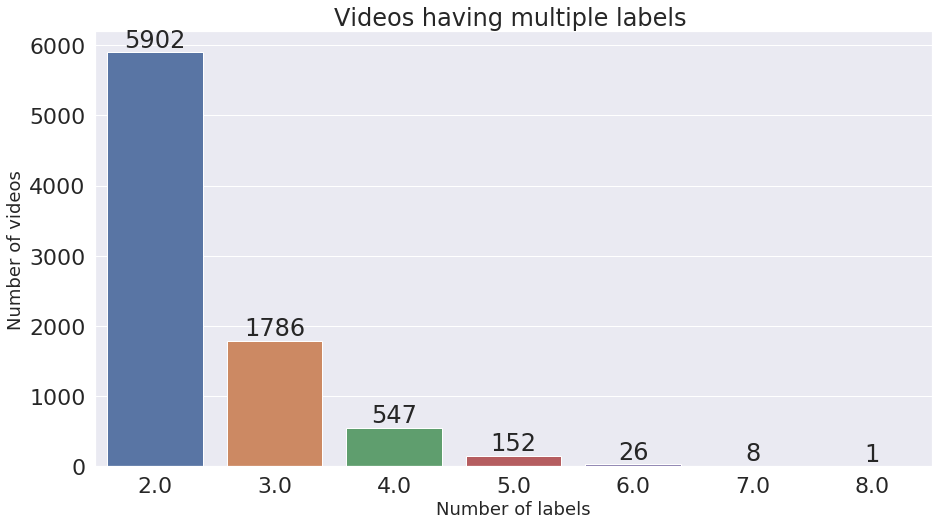

In [12]:
#calculating number of videos having multipl topics

rowSums = df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Videos having multiple labels ")
plt.ylabel('Number of videos', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [13]:
#for this algorithm we will use them as lists
#turn categories to lists

list= []
i = 0
for ch in DF['categories']:
    list = ch.split(",")
    DF.at[i, 'categories'] = list
    i += 1

In [14]:
DF['categories'].values.tolist()
DF

,translated_text,categories
0,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...,[Arts & Entertainment]
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,[Arts & Entertainment]
2,Concrete Floor Leveling Tool a Paper Roller: W...,[Business & Industrial]
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,"[Autos & Vehicles, Home & Garden, Business & I..."
4,Pes 15 Barclays patch and kitspatch Barclays P...,"[Games, Sports]"
5,CCL2 Final Karnataka Bulldozers Vs Chennai Rhi...,"[Games, Sports]"
6,iCaro B4 4ch Channel Sony CCD IR Cameras DVR G...,"[Internet & Telecom, Computers & Electronics]"
7,Destiny: Hunt for Shaders Ep. 7 DEAD ORBIT HYP...,[Games]
8,Sonic the Hedgehog (06) playthrough [Shadow] [...,"[Games, Arts & Entertainment]"
9,"Ultrasonic washing for fruits, vegetables, ber...",[Food & Drink]


In [15]:
#function to clean the word of any punctuation or special characters
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

#function to remove digits just to make sure
def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()►■●•_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [16]:
#function to remove accented chars
import unicodedata
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

In [18]:
#apply changes
import re
#put all the unctions above into one global function
def PreProcessing(text):
    text=removeAscendingChar(text)
    #print(text)
    text=cleanPunc(text)
    #print(text)
    text=keepAlpha(text)
    #print(text)
    text=removeCharDigit(text)
    return(text)


DF['translated_text'] = DF['translated_text'].str.lower()
#apply the function preprocess to our data
DF['translated_text'] = DF['translated_text'].map(lambda com : PreProcessing(com))

DF.head()

,translated_text,categories
0,give me a night by los inquietos besas jonna...,[Arts & Entertainment]
1,youtube doki doki gets bullieddoki tries to ...,[Arts & Entertainment]
2,concrete floor leveling tool a paper roller w...,[Business & Industrial]
3,mi t m psi gpm pressure washer demonstratio...,"[Autos & Vehicles, Home & Garden, Business & I..."
4,pes barclays patch and kitspatch barclays pr...,"[Games, Sports]"


In [19]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however',
                   'yet','within','www','e','de','la','el','v','www','http','com','https','t','b','m','n','o',
                  'p','q','r','s','t','w','x','z'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

DF['translated_text'] = DF['translated_text'].apply(removeStopWords)
#df.head() = data_text['title_description'].apply(removeStopWords)
#df.head()

In [20]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

DF['translated_text'] = DF['translated_text'].apply(stemming)
#df.head() = data_text['title_description'].apply(stemming)
#df.head()

In [21]:
#transforming text to features
#label hot encoding
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(DF['categories'] )

# transform target variable
y = multilabel_binarizer.transform(DF['categories'] )
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [22]:
#getting our x 
x = DF['translated_text']

In [23]:
#tfidf transformation
#vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000)

In [24]:
# split dataset into training and validation set

from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, random_state=9)

In [25]:
#train validationtest shape

print(xtrain.shape)
print(xval.shape)

(14230,)
(3558,)


In [26]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [27]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [28]:
#one vs all classifier
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [29]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

/home/yosr/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [30]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [44]:
#let's see what a prediction for one video looks like
y_pred[1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [45]:
#now let's inverse to know the classes by name
multilabel_binarizer.inverse_transform(y_pred)[1]

('Computers & Electronics', 'Internet & Telecom')

In [31]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.48526187576126684

In [33]:
import sklearn.metrics as metrics
metrics.hamming_loss(yval, y_pred)

0.04750983698707139

In [35]:
# accuracy
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(yval,y_pred))
print("\n")

Accuracy =  0.28161888701517707




In [36]:
#imporove f1 score
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

#setting a new threshold value
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.604001952171791

In [37]:
import sklearn.metrics as metrics
metrics.hamming_loss(yval, y_pred_new)

0.04560989319842608

In [38]:
# accuracy
print("Accuracy = ",accuracy_score(yval,y_pred_new))
print("\n")

Accuracy =  0.3650927487352445




In [47]:
#imporove f1 score
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [48]:
#setting a new threshold value
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [49]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.6038251366120218

In [51]:
y_pred[15]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [53]:
multilabel_binarizer.inverse_transform(y_pred)[15]

('Arts & Entertainment', 'Games')

In [57]:
actual_label = [multilabel_binarizer.inverse_transform(yval)[0],
                multilabel_binarizer.inverse_transform(yval)[1],
                multilabel_binarizer.inverse_transform(yval)[2],
               multilabel_binarizer.inverse_transform(yval)[3],
               multilabel_binarizer.inverse_transform(yval)[4]]
actual_label

[('Food & Drink', 'Home & Garden'),
 ('Computers & Electronics', 'Internet & Telecom'),
 ('Arts & Entertainment',),
 ('Arts & Entertainment',),
 ('Autos & Vehicles', 'Reference', 'Travel')]

In [58]:
predicted_label = [multilabel_binarizer.inverse_transform(y_pred_new)[0],
                   multilabel_binarizer.inverse_transform(y_pred_new)[1],
                   multilabel_binarizer.inverse_transform(y_pred_new)[2],
                   multilabel_binarizer.inverse_transform(y_pred_new)[3],
                   multilabel_binarizer.inverse_transform(y_pred_new)[4]
                  ]
predicted_label

[(),
 ('Computers & Electronics', 'Internet & Telecom'),
 ('Arts & Entertainment',),
 ('Arts & Entertainment',),
 ('Travel',)]

In [59]:

# Python script for confusion matrix creation. 
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
results = multilabel_confusion_matrix(yval, y_pred_new) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(yval, y_pred_new)) 
print ('Report : ')
print (classification_report(yval, y_pred_new)) 

Confusion Matrix :
[[[3510    0]
  [  48    0]]

 [[1664  625]
  [ 204 1065]]

 [[2960   81]
  [ 174  343]]

 [[3393    6]
  [  93   66]]

 [[3515    0]
  [  38    5]]

 [[3138   56]
  [ 239  125]]

 [[3109   63]
  [ 185  201]]

 [[3554    0]
  [   4    0]]

 [[3335    9]
  [ 126   88]]

 [[2517  233]
  [ 199  609]]

 [[3548    0]
  [  10    0]]

 [[3292   21]
  [ 185   60]]

 [[3406    3]
  [ 128   21]]

 [[3408    8]
  [  86   56]]

 [[3539    0]
  [  19    0]]

 [[3461    1]
  [  83   13]]

 [[3494    1]
  [  62    1]]

 [[3502    0]
  [  49    7]]

 [[3378    8]
  [ 129   43]]

 [[3527    0]
  [  29    2]]

 [[3509    0]
  [  48    1]]

 [[3274   27]
  [ 198   59]]

 [[3341    9]
  [ 158   50]]

 [[2997   82]
  [ 236  243]]

 [[3425    8]
  [  89   36]]]
Accuracy Score : 0.364530635188308
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.63      0.84      0.72      1269
           2       0.81

/home/yosr/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yosr/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [65]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf, xval_tfidf, yval)  # doctest: +SKIP
plt.show()  # doctest: +SKIP

ImportError: cannot import name 'plot_confusion_matrix'